# Canny法によるエッジ検出
## 目的
このチュートリアルでは以下について学ぶ．

* Canny法によるエッジ検出
* OpenCVの <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html?highlight=cv2.canny#cv2.Canny" target="_blank">cv2.Canny()</A> 関数

## 理論
Canny法とはJohn F. Cannyが1986年に発表したエッジ検出のためのアルゴリズムである． 複数ステップによってエッジ検出を行う：

### 1. ノイズ削減
エッジ検出は画像中のノイズに対して敏感なため，まず初めに画像を平滑化してノイズを削減する．具体的には、5x5のサイズの Gaussianフィルタを使う．なお、フィルタリングの方法は前のチュートリアルで既に学んでいる．

### 2. 画像の輝度勾配を見つける
次に，平滑化された画像からSobelフィルタを使って縦方向(G_y)と横方向(G_x)の1次微分を取得する．これら2つの微分画像から以下のようにエッジの勾配と方向を求める:

$Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2}$

$Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)$

勾配方向は常にエッジに対して直交する．勾配方向は横，縦，二つの対角方向のうちのどれか一つになる．

### 3. 非極大値の抑制
勾配の方向と強度を計算した後は，エッジと関係ない画素を取り除く．具体的には，各画素に対してその画素が勾配方向に対して極大値であるかどうかを確認する．以下の画像を使って説明する:

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/nms.jpg)

点Aは縦方向のエッジ上の点であり、勾配方向はこのエッジの法線である．点BとCはこの勾配方向上の点である．そこで，点Aが極大値であるかどうかは、勾配方向上の点BとCを使って確かめられる．もし点Aが極大値であれば次の計算に進み，そうでなければ抑制される（つまり値は0となる）．

端的に言えば、これにより「細いエッジ」を持つ2値画像が得られる．

### 4. ヒステリシス(Hysteresis)を使ったしきい値処理
この処理では、前処理で検出されたエッジをさらに，本当のエッジとそうでないものに分類する．この分類のため， minVal と maxVal という二つの閾値を用いる．微分値が maxVal 以上のエッジは本当のエッジとされ， minVal 以下の値であればエッジではないとみなされ、取り除かれる．微分値が二つのしきい値の間の場合は，本当のエッジとそうでないエッジとの隣接関係を基に分類される．つまり、本当のエッジと分類された画素につながっていれば本当のエッジ、そうでなければエッジではない画素とみなす．次の絵を用いて説明する:

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/hysteresis.jpg)

エッジAは maxVal 以上の値であるため “本当のエッジ” であるとみなす．エッジCは maxVal より小さい値であるが，エッジAにつながっているためエッジであるとみなされる．一方，エッジBは minVal より大きい値ではあるが “本当のエッジ” にはつながっていないため、本当のエッジではないと分類される．このことから，正しい結果を得るためには minVal と maxVal の値を正しく設定する事が重要であることが分かる．

この処理では，エッジは長い線であるという前提のもと，少数の画素で構成されるエッジも削除する．

最終的に画像中の強いエッジを検出する．

## OpenCVのCannyエッジ検出
OpenCVには、上記の全ての処理を実行する <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/feature_detection.html?highlight=cv2.canny#cv2.Canny" target="_blank">cv2.Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) </A>という関数がある．以下に使い方を説明する．第1引数`image`には入力画像を指定する．第2,3引数(`threshold1`, `threshold2`)には、ヒステリシスを使った閾値処理に用いる `minVal` と `maxVal` をそれぞれ指定する．オプションの引数`apertureSize`には画像の勾配を計算するためのSobelフィルタのサイズであり，デフォルト値は3である．オプション引数`L2gradient`は勾配強度を計算するためのフラグで、 True を指定すると上述の式を使い，より精度が高いエッジ強度を計算する．そうでなければ、次の式を使ってエッジ強度を計算する:

$Edge\_Gradient \; (G) = |G_x| + |G_y|$

デフォルトは Falseである．

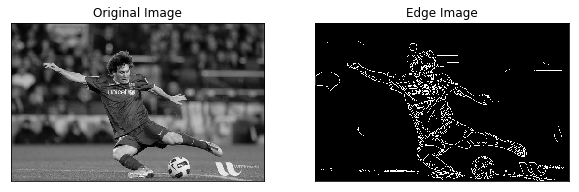

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(10,5))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## 補足資料
1. Cannyエッジ検出 <A HREF="http://en.wikipedia.org/wiki/Canny_edge_detector" target="_blank">Wikipedia(英語)</A>
2. Bill Greenによる <A HREF="http://dasl.unlv.edu/daslDrexel/alumni/bGreen/www.pages.drexel.edu/_weg22/can_tut.html" target="_blank">Cannyエッジ検出チュートリアル(英語) 2002</A>.

## 課題
* Cannyエッジ検出の二つのしきい値をトラックバーで変更できるプログラムを作成せよ．この方法でしきい値の効果が理解できるだろう．なお、これには[「カラーパレットとしてのトラックバー 」](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/trackbar.html)で学んだ技法が使われる。

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVを使った画像処理<BR>
OpenCVが提供する様々な画像処理の関数について学ぶ
* 前の学習項目 [画像の勾配 gradient.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/gradient.html)<BR>
画像の勾配，エッジなどの検出方法を学ぶ．
* 次の学習項目 [画像ピラミッド pyramids.ipynb]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/pyramids.hrml)<BR>
画像ピラミッドと画像ピラミッドを使ったブレンディングを学ぶ．